In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


imgpil = Image.open("./cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png")  
img = np.array(imgpil)

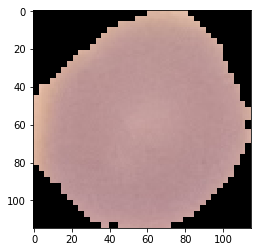

In [2]:
plt.imshow(img)
plt.show()


def f(t):
    imgpil = Image.open(t)  
    return np.array(imgpil)

13779


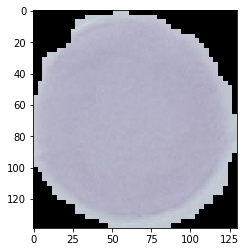

In [10]:
import glob
a=glob.glob('./cell_images/Uninfected/*.png')
#img = np.array(a)
print(len(a))
uninfected = [Image.open(t) for t in a[0:10]]
plt.imshow(uninfected[4])
plt.show()

In [69]:
import zipfile
from io import BytesIO

path_par = "cell_images/Parasitized.zip"
path_un = "cell_images/Uninfected.zip"

def extract_zip_to_memory(input_zip):
    '''
    This function extracts the images stored inside the given zip file.
    It stores the result in a python dictionary.
    
    input_zip (string): path to the zip file
    
    returns (dict): {filename (string): image_file (bytes)}
    '''
    input_zip=zipfile.ZipFile(input_zip)
    return {name: BytesIO(input_zip.read(name)) for name in input_zip.namelist() if name.endswith('.png')}

par_img_files = extract_zip_to_memory(path_par)
un_img_files = extract_zip_to_memory(path_un)

images_infected = np.array([np.asarray(Image.open(x)) for x in par_img_files.values()])
images_uninfected = np.array([np.asarray(Image.open(x)) for x in un_img_files.values()])

# list_images_infected = [images_infected[i].reshape(len(images_infected[i]*len(images_infected[i][0])),0)]


<class 'numpy.uint8'>
148 142


In [70]:
list_images_infected = [images_infected[i].reshape(len(images_infected[i])*len(images_infected[i][0]),3) for i in range(len(images_infected))]
list_images_uninfected = [images_uninfected[i].reshape(len(images_uninfected[i])*len(images_uninfected[i][0]),3) for i in range(len(images_uninfected))]

In [77]:
var_r = np.array([list_images_infected[:][1].var() for i in range(len(list_images_infected))])
var_nonInfect = np.array([list_images_uninfected[:][1].var() for i in range(len(list_images_uninfected))])

In [78]:
print(np.sqrt(var_r.mean()))
print(np.sqrt(var_nonInfect.mean()))
print(list_images_uninfected[:][0].max())

85.67942071452481
82.60371425185019
225
